# Quantitative Methods Part II

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import math

## Common Probability Distributions

Use cases examples:
- the Black–Scholes–Merton option pricing model
- the binomial option pricing model (price up or price down)
- the capital asset pricing model

### Introduction to Common Probability Distributions
A probability distribution specifies the probabilities of the possible outcomes of a random variable. Examples of random variables:
- return on a stock
- earnings per share 

### Discrete and Continous Random Variables
<br>
The mathematical operation that corresponds to finding the area under the curve of a pdf f(x) from a to b is the integral of f(x) from a to b:

$$P(a\le X\le b)=\int^b_af(x)dx$$
<div style="text-align: right"> Equation 2 </div>


*Note: For any continuous random variable X, P(a ≤ X ≤ b) = P(a < X ≤ b) = P(a ≤ X < b) = P(a < X < b), because the probabilities at the endpoints a and b are 0.*

We can view a probability distribution in two ways:
#### Probability Function
P(X = x) is the probability that a random variable X takes on the value x. (Note that capital X represents the random variable and lowercase x represents a specific value that the random variable may take.) 
- For a discrete random variable, the shorthand notation for the probability function is p(x) = P(X = x). 
- For continuous random variables, the probability function is denoted f(x) and called the probability density function (pdf), or just the density.

#### Cumulative Distribution Function (cdf)
It gives the probability that a random variable X is less than or equal to a particular value x, P(X ≤ x). For both discrete and continuous random variables, the shorthand notation is F(x) = P(X ≤ x). <br><br>
The cdf has two other characteristic properties:
- The cdf lies between 0 and 1 for any x: 0 ≤ F(x) ≤ 1.
- As we increase x, the cdf either increases or remains constant.

### The Uniform Distribution 
Probability distribution that describes equally likely outcomes. <br>
#### Discrete Uniform Distribution
The pdf for a uniform random variable is:
\begin{equation}
  f(x) =
   \begin{cases}
      \frac{1}{b−a} & \text{for a<x<b}\\
      0 & \text{otherwise}
   \end{cases}       
\end{equation}

#### Continuous Uniform Distribution
\begin{equation}
  f(x) =
   \begin{cases}
      0 & \text{for $x\le a$}\\
      \frac{x-a}{b-a} & \text{for a<x<b}\\
      1 & \text{for $x \geqslant b$}
   \end{cases}       
\end{equation}

### The Binomial Distribution（二项分布）
When we make probability statements about a record of successes and failures, or about anything with binary outcomes, we often use the binomial distribution.<br>


$X$~$B(n,p)$ read as “X has a binomial distribution with parameters n and p.”<br>
<br> 
The building block of the binomial distribution is the **Bernoulli random variable**. A trial (an event that may repeat) that produces one of two outcomes. Such a trial is a Bernoulli trial. If we let Y equal 1 when the outcome is success and Y equal 0 when the outcome is failure, then the probability function of the Bernoulli random variable Y is
$$p(1) = P(Y = 1) = p$$
$$p(0) = P(Y = 0) = 1 – p$$
where p is the probability that the trial is a success. 

For X distributed B(n, p), the probability of x successes in n trials is given by<br>
$$p(x)=P(X=x)=\binom{n}xp^x(1−p)^{n−x}=\frac{n!}{(n−x)!x!}p^x(1−p)^{n−x}$$
<div style="text-align: right"> Equation 1 </div>

given independent trials, any sequence with x up moves must occur with probability $p^x(1 − p)^{n–x}$

#### Example 
Consider a random variable distributed B(n = 5, p = 0.50):

In [2]:
data = {'Number of Up Moves, x':[0,1,2,3,4,5]}
df = pd.DataFrame(data=data)
df

,"Number of Up Moves, x"
0,0
1,1
2,2
3,3
4,4
5,5


In [78]:
# For convenience of calculation, turning the column into a list
x = pd.to_numeric(df['Number of Up Moves, x'].to_list())
x
p = 0.50
n = 5

In [79]:
# Counting number of ways to choose X from n
results = []
numerator = math.factorial(5) # why 5 instead of 6 (i.e., len(x))?

for i in x:
    denominator = math.factorial(5-i) * math.factorial(i)
    result = numerator/denominator
    results.append(result)
print(results)

# Append a column to represent the results
df['Number of Possible Ways to Reach x Up Moves'] = results

[1.0, 5.0, 10.0, 10.0, 5.0, 1.0]


In [80]:
# Calculating P of each way
results2 = []
for i in x: 
    result = p**i * (1-p)**(n-i)
    results2.append(result)

# Append the list to a new column    
df['Probability for Each Way'] = results2

In [81]:
# Calculating the probability for each value of the number of up moves from the first column (using an alternative approach)
df['Probability for x, p(x)'] = df['Number of Possible Ways to Reach x Up Moves'] * (1/sum(results))

In [82]:
# Cumulating the entries in the fourth column, the cumulative distribution function
cdf = []
pdf = df['Probability for x, p(x)'].to_list()

# Calculate the cdf
for i in range(len(pdf)):
    result3 = pdf[0:i+1]
    print(result3)
    cdf.append(sum(result3))
    
# Append the list to a new column
df['F(x) = P(X ≤ x)'] = cdf

[0.03125]
[0.03125, 0.15625]
[0.03125, 0.15625, 0.3125]
[0.03125, 0.15625, 0.3125, 0.3125]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]


In [83]:
df

,"Number of Up Moves, x",Number of Possible Ways to Reach x Up Moves,Probability for Each Way,"Probability for x, p(x)",F(x) = P(X ≤ x)
0,0,1.0,0.59049,0.03125,0.03125
1,1,5.0,0.06561,0.15625,0.18750
2,2,10.0,0.00729,0.31250,0.50000
3,3,10.0,0.00081,0.31250,0.81250
4,4,5.0,0.00009,0.15625,0.96875
5,5,1.0,0.00001,0.03125,1.00000


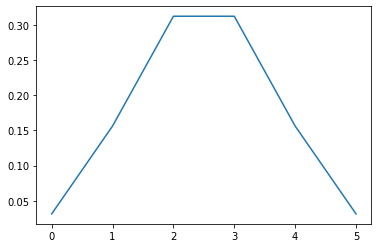

In [84]:
# Observe how the change of p(x) influence the skewness of the curve
plt.plot(df['Probability for x, p(x)']);

#### Example 

In [85]:
data = {'Block Brokers': ['BB001', 'BB002'], 
       'Profitable Trades': [3, 5], 
       'Losing Trades': [9, 3]}
df = pd.DataFrame(data=data)
df

,Block Brokers,Profitable Trades,Losing Trades
0,BB001,3,9
1,BB002,5,3


If you are paying a fair price on average in your trades with a broker, what should be the probability of a profitable trade?

In [ ]:
# 

Under the assumption that the prices of trades were fair,
1. calculate the probability of three or fewer profitable trades with broker BB001.
2. calculate the probability of five or more profitable trades with broker BB002.

In [ ]:
# 

#### Example: using binomial distribution to evaluate the performance of an investment manager<br>

Expected to keep portfolio return within a band of 75 basis points (bps) of the benchmark’s return, on a quarterly basis, portfolio return is within the 75 bps band 90 percent of the time.

Question: The manager meets the objective in six out of eight quarters. How does the manager’s record precisely relate to your expectation of a 90 percent success rate and the sample size, 8 observations?

In [86]:
# List of known variables
n = 8
p = 0.90

In [90]:
# find the probability that, given an assumed true or underlying success rate of 90 percent, performance could be as bad as or worse than that delivered.
data = {'Number of Success (>=75 bps)':[0,1,2,3,4,5,6,7,8]}
df = pd.DataFrame(data=data)
df

,Number of Success (>=75 bps)
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [91]:
results = []
numerator = math.factorial(n) 
x = df['Number of Success (>=75 bps)'].to_list()
# Counting the number of ways to reach the corresponding sucesses
for i in x:
    denominator = math.factorial(n-i) * math.factorial(i)
    result = numerator/denominator
    results.append(result)
print(results)

# Append a column to represent the results
df['Number of Possible Ways to Reach x'] = results

[1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]


In [94]:
# Probability of each way 
results = []
for i in x:
    p_x = p**i
    p_y = (1-p)**(n-i)
    result = p_x * p_y
    results.append(result)
df['Probability for Each Way'] = results

In [96]:
# 
df['Probability for x, p(x)'] = df['Number of Possible Ways to Reach x'] * df['Probability for Each Way']

In [97]:
df

,Number of Success (>=75 bps),Number of Possible Ways to Reach x,Probability for Each Way,"Probability for x, p(x)"
0,0,1.0,1.000000e-08,1.000000e-08
1,1,8.0,9.000000e-08,7.200000e-07
2,2,28.0,8.100000e-07,2.268000e-05
3,3,56.0,7.290000e-06,4.082400e-04
4,4,70.0,6.561000e-05,4.592700e-03
5,5,56.0,5.904900e-04,3.306744e-02
6,6,28.0,5.314410e-03,1.488035e-01
7,7,8.0,4.782969e-02,3.826375e-01
8,8,1.0,4.304672e-01,4.304672e-01


In [101]:
# Solving for P(x>0.75), i.e. number of success of 6
cdf = df['Probability for x, p(x)'].to_list()
print(sum(cdf[0:7]))
print('There is a moderate 18.7 percent probability that the manager would show the record he did (or a worse record) if he had the skill to meet your expectations 90 percent of the time.')

0.18689526999999992
There is a moderate 18.7 percent probability that the manager would show the record he did (or a worse record) if he had the skill to meet your expectations 90 percent of the time.


*Note: You can use other evaluation concepts such as tracking error or tracking risk, defined as the standard deviation of return differences between a portfolio and its benchmark, to assess the manager’s performance.*

#### Mean and Variance of Binomial Random Variables
\[Explain the following table\]

In [104]:
des = {'X~B(n,p)': ['Bernoulli, B(1, p)', 'Binomial, B(n, p)'],
      'Mean': ['p', 'np'], 
      'Variance': ['p(1-p)', 'np(1-p)']}
df = pd.DataFrame(data=des)
df

,"X~B(n,p)",Mean,Variance
0,"Bernoulli, B(1, p)",p,p(1-p)
1,"Binomial, B(n, p)",np,np(1-p)


### The Normal Distribution (Continuous Random Variables)
Use cases: 
- modern portfolio theory 
- risk management technologies
- an approximate model for returns

#### The Central Limit Theorem
The sum (and mean) of a large number of independent random variables is approximately normally distributed.

#### Characteristics of Normal Distribution
1. The normal distribution is completely described by two parameters—its mean, $μ$, and variance, $σ^2$. 

$X$ ~ $N(μ, σ^2)$
(read “X follows a normal distribution with mean $μ$ and variance $σ^2$”)


2. The normal distribution has a skewness of 0 (it is symmetric). (The normal distribution has a kurtosis of 3; its excess kurtosis (kurtosis − 3.0) equals 0).
3. A linear combination of two or more normal random variables is also normally distributed.

A multivariate normal distribution for the returns on n stocks is completely defined by three lists of parameters:
- the list of the mean returns on the individual securities (n means in total);

- the list of the securities’ variances of return (n variances in total); and

- the list of all the distinct pairwise return correlations: n(n − 1)/2 distinct correlations in total.

**In order to specify the normal distribution for portfolio return, we need the means, variances, and the distinct pairwise correlations of the component securities.**

$$f(x)=\frac{1}{σ\sqrt{2π}}exp\big(\frac{−(x−μ)^2}{2σ^2}\big)\ \ \  for−∞<x<+∞$$
<div style="text-align: right"> Equation 3 </div>

The normal density with $μ = 0$ and $σ = 1$ is called the standard normal distribution (or unit normal distribution). 

##### Empirical example: normal distribution as an approximate model for returns
- The normal distribution is a closer fit for quarterly and yearly holding period returns on a diversified equity portfolio than it is for daily or weekly returns.
- When we approximate equity return distributions with the normal distribution, we should be aware that the normal distribution tends to underestimate the probability of extreme returns.
- Option returns are skewed. Because the normal is a symmetrical distribution, we should be cautious in using the normal distribution to model the returns on portfolios containing significant positions in options.
- Less suitable as a model for asset prices.

Having established that the normal distribution is the appropriate model for a variable of interest, we can use it to make the following probability statements:
- Approximately 50 percent of all observations fall in the interval μ ± (2/3)σ.

- Approximately 68 percent of all observations fall in the interval μ ± σ.

- Approximately 95 percent of all observations fall in the interval μ ± 2σ.

- Approximately 99 percent of all observations fall in the interval μ ± 3σ.

#### Standardizing a Random Variable
If we have $X$ ~ $N(μ,σ^2)$ (read “$X$ follows the normal distribution with parameters $μ$ and $σ^2$”), we standardize it using the formula

$$Z = \frac{(X – μ)}{σ}$$
<div style="text-align: right"> Equation 4 </div>

The probability that we will observe a value as small as or smaller than 9.5 for X ~ N(5,1.5) is exactly the same as the probability that we will observe a value as small as or smaller than 3 for Z ~ N(0,1). We can answer all probability questions about X using standardized values and probability tables for Z.

\[Revisit Example 8\]

#### Applications of the Normal Distribution
##### Shortfall Risk
Safety-first rules focus on shortfall risk, the risk that portfolio value will fall below some minimum acceptable level over some time horizon.




##### Safety-first Ratio
$$SFRatio = \frac{[E(R_P) – R_L]}{σ_P}$$
<div style="text-align: right"> Equation  </div>


##### Select an Optimal Portfolio Using Roy’s Safety-first Criterion


### Lognormal Distribution and Continuous Compounding


<div style="text-align: right"> Equation  </div>

#### Monte Carlo Simulation


## Sampling and Estimation

## R11: Hypothesis Testing

Monte Carlo simulation: need to identify risk factors associated with the problem and specify probability distributions for them. 